In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

In [13]:
# load ArcFace scores for Adience
scores_gen = np.load("Scores_adience/scores_gen_adience.npy")
scores_imp = np.load("Scores_adience/scores_imp_adience.npy")

num_gen, num_imp = len(scores_gen), len(scores_imp)
print(num_gen, num_imp)

682226 682226


In [5]:
# put them together
scores = np.hstack([scores_imp, scores_gen]) #comparison scores (continuous value)
labels = np.hstack([np.zeros(num_imp), np.ones(num_gen)]) #0 for imposter and 1 for genuine. True labels

In [14]:
# compute roc data
fpr, tpr, thresholds = roc_curve(labels, scores)
fnmr = 1 - tpr
fmr = fpr
print('fnmr :', fnmr)
print('fmr :', fmr)
print('thresolds :', thresholds)

fnmr : [1.         0.99840815 0.99836711 ... 0.         0.         0.        ]
fmr : [0.         0.         0.         ... 0.99953241 0.99953534 1.        ]
thresolds : [ 2.          1.          0.99627938 ... -0.22256266 -0.22268413
 -0.31770963]


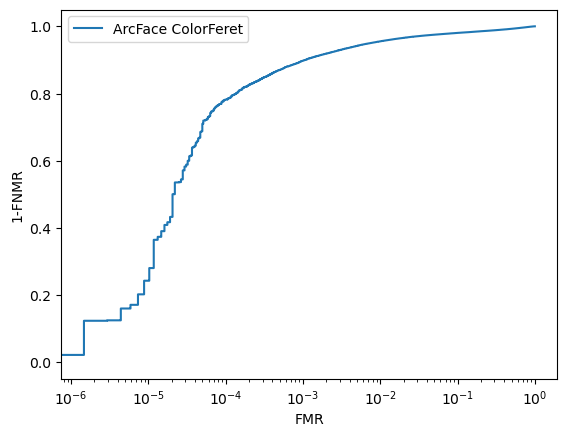

In [25]:
# plot ROC
plt.figure()
plt.plot(fmr, 1-fnmr, label="ArcFace ColorFeret")
plt.xlabel("FMR")
plt.ylabel("1-FNMR")
plt.xscale("log")
plt.legend()

plt.show()

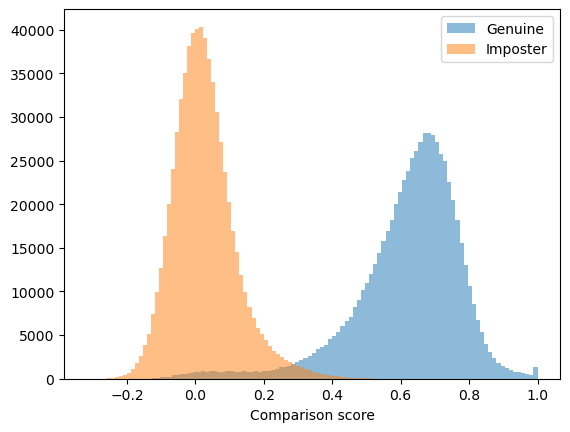

In [15]:
# plot score distribution
plt.figure()
plt.hist(scores_gen, label="Genuine", bins=100, alpha=0.5)
plt.hist(scores_imp, label="Imposter", bins=100, alpha=0.5)
plt.xlabel("Comparison score")
plt.legend()

In [9]:
# compute metrics

#get fnmr and threshold for a specific fmr
    #1. detect the value in the list od fmr that is closer to our fmr_target --> np.abs(fmr-fmr_target)
    #2. save in idx the position of the velue detected in 1. --> np.argmin(np.abs(fmr-fmr_target))
    #3. take the fnmr and the threshold correponding to the position saved in idx --> fnmr[idx], thresholds[idx]
def getFNMRatFMR(fmr_target, fmr, fnmr, thresholds):
    idx = np.argmin(np.abs(fmr-fmr_target))
    return fnmr[idx], thresholds[idx]

#get fnmr/fmr and threshold for eer
    #1. detect where fmr and fnmr are closer --> np.abs(fmr-fnmr)
    #2. save in idx the position of the value detected in 1 --> np.argmin(np.abs(fmr-fnmr))
    #3. take the fnmr (or fmr) and the threshold corresponding to the position saved in idx --> fnmr[idx], thresholds[idx]
def getEER(fmr, fnmr, thresholds):
    idx = np.argmin(np.abs(fmr-fnmr))
    return fnmr[idx], thresholds[idx]

#take the fnmr and threshold for fmr=0.01
fnrmFmr01, fnrmFmr01_thr  = getFNMRatFMR(0.01, fmr, fnmr, thresholds)
#take the eer
eer, eer_thr = getEER(fmr, fnmr, thresholds)

print("EER: {}, threshold: {}".format(eer, eer_thr))
print("FNMR@0.01FMR: {}, threshold: {}".format(fnrmFmr01, fnrmFmr01_thr))


EER: 0.02970423290815649, threshold: 0.23406005686842957
FNMR@0.01FMR: 0.044653824392503316, threshold: 0.3123690187531324


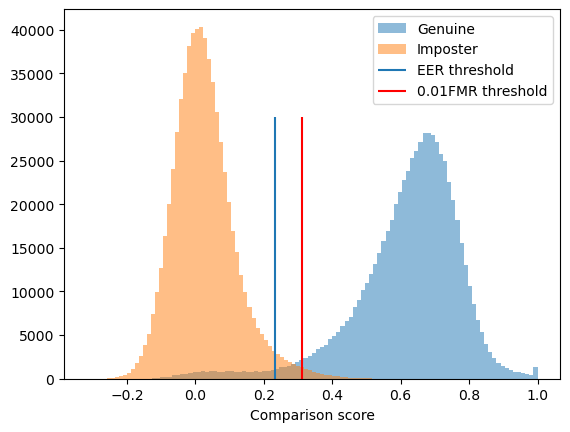

In [24]:
# plot score distribution
plt.figure()
plt.hist(scores_gen, label="Genuine", bins=100, alpha=0.5)
plt.hist(scores_imp, label="Imposter", bins=100, alpha=0.5)
plt.xlabel("Comparison score")
plt.vlines(eer_thr, 0, 30000, label="EER threshold")
plt.vlines(fnrmFmr01_thr, 0, 30000, color="red", label="0.01FMR threshold")
plt.legend()